# RIT-Intuit-Challenge 2017

## 

In [80]:
%matplotlib inline

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("colorblind", 10), desat=.6)
sns.set_context(rc={'figure.figsize': (8, 4)})

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16}

D:\Users\Sameer\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [204]:

'''
Import data from csv into an overall 
data-frame indexed by the auth_id of a user.
We will be using this data-frame to do our user-specific 
queries.

Map the user-number as it appears on the 
csv filename to their auth_id in the 
muser_map dictionary.
'''
user_map = {}

# A list of all the dataframes
# formed from the csv files.
data_frames = []
 
for i in range(100):
    
    url = "https://rawgit.com/intuit-recruiting/rit-challenge/tree/master/transaction-data"
    
    # Make sure the csv files are present :)
    filename = "user-{}.csv".format(i)
    
    user_df = pd.read_csv(filename, index_col=['auth_id'])
    
    # Store auth_id in the dictionary
    user_map[i] = user_df.index[0]
    #print(user_df.index[0])
    
    # Strip the column names of leading and trailing whitespace. 
    user_df.rename(columns=lambda x: x.strip(), inplace=True)
    
    # Convert Date to datetime field    
    user_df['Date'] = pd.to_datetime(user_df.Date, infer_datetime_format=True, errors='coerce') 
        
    
    # Add to data frames
    data_frames.append(user_df)

# Collect all data frames into one table
df = pd.concat(data_frames)


In [ ]:
def get_user_transactions_all(user):
    '''
    This simply returns a data frame containing 
    transactions for the given user, indexed by
    date.
    '''
    # Defaults to 0 for now, must handle in the future
    user = user_map[user] if user in user_map else 0
    
    user_df = df.loc[user, :]
    #user_df.loc[user, 'auth_id'] = user_df.index
    user_df.set_index('Date', inplace=True)
    
    # Add columns for easier grouping-by-time operations
    user_df.loc[:, 'year'] = user_df.index.year.astype(int)
    user_df.loc[:, 'month'] = user_df.index.month.astype(int)
    user_df.loc[:, 'week'] = user_df.index.week.astype(int)
    user_df.loc[:, 'weekday'] = user_df.index.weekday    
    
    return user_df

In [220]:
get_user_transactions_all(12).head()

D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Vendor,Amount,Location,year,month,week,weekday
Date,,,,,,,
2013-01-02,Amazon Order - Star Wars Figurine,-22.73,CA,2013,1,1,2.0
2013-01-02,Library Membership,-37.26,CA,2013,1,1,2.0
2013-01-02,Goods2 - ThinkGeek,-71.48,CA,2013,1,1,2.0
2013-01-03,Amazon Order - Biology Book,-69.48,CA,2013,1,1,3.0
2013-01-03,Coffee,-56.46,CA,2013,1,1,3.0


In [218]:
get_user_income(2, period='Month')

D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2627.0

In [217]:
def get_user_transactions_expenditure(user):
    '''
    Get all user transactions that involve expenditure.
    '''
    user_df = get_user_transactions_all(user)
    user_df = user_df.loc[user_df.Amount < 0, :]
    return user_df

def get_user_transactions_credits(user):
    '''
    Gets all records creditted to the users
    account
    '''
    user_df = get_user_transactions_all(user)
    user_df = user_df.loc[user_df.Amount > 0 or user_df.Vendor, :]
    return user_df

def get_user_income(user, period='Year'):
    userdf = get_user_transactions_credits(user)
    
    if period == 'Year':
        return userdf.resample('A').Amount.sum().mean()
    elif period == 'Month':
        return userdf.resample('M').Amount.sum().mean()

def 
    

# Features To Explore:
----------------------------------------------------
- ### Compatibility
    * Get hobby transactions
    * Hobby transactions are classifiedinto broad categories
        + Music
        + Sports
        + Art
        + Entertainment
        + Video Games
    * Get total expenditure of a user in each of these hobby categories
    * This is the score we will work with
    * Two users are compatible if they have minimum delta across all categories
- ### Expecting Baby
    * Assign score based on number of transactions involving baby related items    
- ### Social Activity
    *  Assign score based on amount of transactions involving a bar or restaurant or movie hall.
- ### Indoor Activity
    * Assign score based on indoor related stuff - like dvd rentals, netflix subscriptions, food deliveries etc.            
- ### Fiscal problems
    * Get score of late payments and overdue notices etc
   
   
    

# Computing Features
------------------------------------
In the process of playing around with the data, and trying to extract some of the features, I realized that some of the queries (especially ones involving all users accross several categories) were taking a lot of time. To solve this, I employ a very well known object oriented design pattern - the Singleton. 

The Singleton interface I have created, computes amounts spent by all users on transactions grouped in several categories and stores it in a dictionary data structure. This dictionary can be used by all the other feature extraction methods that come forth.

The singleton makes it so that only a single instance of this dictionary exists at any given point, and all clients asking for this information receive it (the instance), and do not have to do the computation all over again. 

In [287]:
class CategoryScores:
    
    category_instance = None
    
    class __CategoryScores:
        
        def __init__(self):            
            # It might be useful to precompute, since queries take a lot of time
            # Hence, we are doing this whole singleton spiel 
            
            # There has got to be a better way of getting these keywords and categories.
            # But this should do, for now. 
            self.categories = {
                'Music': ['Concert', 'Guitar', 'guitar','music','piano'],
                'Sports': ['Sport','sports','NFL','NBA'],
                'Entertainment': ['movie', 'dvd'],
                'VideoGames':['game','playstation','xbox','nintendo','console'],
                'Books':['book','books','library'],
                'Art':['art','Art','Paint','canvas'],
                'Social': ['restaurant', 'bar', 'ticket', 'club', 'brewery'],
                'Indoor': ['on demand', 'food delivery'],
                'Child': ['baby', 'hospital', 'maternity', 'prenatal', 'parental'],
                'Nerd': ['star wars', 'star trek'],
                'Student': ['science', 'biology', 'textbook', 'student'],
                'FiscalProblems': ['late fee', 'overdraft', 'negative balance', 'overdue', 'late']
                
            }            
            self.category_maps = None
            self.build_category_scores()
            
        def build_category_scores(self):
            if not self.category_maps:
                self.category_maps = {}
                # Build all category maps
                for user in range(100):
                    userdf = get_user_transactions_expenditure(user)
                    user_category_map = {}
                    
                    for key in self.categories.keys():                        
                        search_string = "|".join(self.categories[key])        
                        user_category_map[key] = int(userdf[userdf.Vendor.str.contains(search_string, case=False)]
                                                     .Amount.abs().sum())
                        
                    self.category_maps[user]  = user_category_map
    def __new__(cls): 
        if not CategoryScores.category_instance:
            CategoryScores.category_instance = CategoryScores.__CategoryScores()
        return CategoryScores.category_instance
    
    def __getattr__(self, name):
        return getattr(self.category_instance, name)

# Adding Features
------------------------------
In order to add features, I need a single data frame which is indexed by a users auth_id, and has columns containing scores or other metrics for features. I have again chosen to represent this singular data frame as a singleton (called UserFeatures).

In [251]:
class UserFeatures:
    instance = None
    
    class __UserFeatures:
        
        def __init__(self):
            self.user_features_data_frame = pd.DataFrame(index=df.index.unique())
            
    def __new__(cls): 
        if not UserFeatures.instance:
            UserFeatures.instance = UserFeatures.__UserFeatures()
        return UserFeatures.instance
    
    def __getattr__(self, name):
        return getattr(self.instance, name)
    
    def __setattr__(self, name):
        return setattr(self.instance, name)
           
            

## Decorator for feature addion
----------------------------------------------
The following block is a nice design pattern commonly deployed in python wherein a functions functionality can be extended by 'decorating' it with another function. In my case, I have made the add_feature decorator such that it adds a feature to all the users present in the UserFeatures singleton. 

In [294]:
def add_feature(add_feature_func):
    '''
    Decorator function that returns a data-frame 
    that contains a column representing  the 
    feature implemented by the feature_func function.
    
    The feature func should be a function over users and
    return a single value, and should also have an optional
    kwarg specifying the name of the resultant feature column.
    '''
    
    def __add_feature_to_data_frame(column_name):
        name = column_name
        #print(name)
        user_features = UserFeatures()
        user_features.user_features_data_frame.loc[:,name] = add_feature_func(name)
    
    return __add_feature_to_data_frame
                
                
        

The following code demonstrates the features of the design decisions I have chosen to make. 
<code>is_expecting(user)</code> checks if the user has any transactions pertaining to newborns or maternity care. 
<code>add_is_expecting</code> uses is_expecting and the <code>@add_feature</code> decorator syntax sugar to add this feature to our features table

In [288]:
def is_expecting(user):
    '''
    Assigns the user a score on whether the user is a parent of 
    a new born or expecting a baby
    '''
    # Get user expenditure in a data frame
    
    all_users_category_scores = CategoryScores().category_maps  
    is_expecting_ans = 1 if all_users_category_scores[user]['Child'] > 0 else 0
    #userdf = userdf[userdf.Vendor.str.contains('Baby|Babies|Maternity|Prenatal')].Amount.abs().sum()
        
    return is_expecting_ans

@add_feature
def add_is_expecting(column_name):
    
    return [is_expecting(user) for user in range(100)]

In [297]:
add_is_expecting('ExpectingChild')


In [306]:
UserFeatures().user_features_data_frame.head()

,ExpectingChild
auth_id,
624,1
63891,1
89593,1
99842,1
57556,1


# User Compatibility
---------------------------------
In order to get a score for the compatibility between users, I have used transactions made by them for hobbies and interests as a measuring stick. We compute the euclidean distance between two users (for these hoobies and interests) to arrive at a score that represents how close two are in these terms. 

I can then use this to add a feature in our features data-frame that shows the auth_id of the user most compatible with the current user. 

In [231]:
   
def get_hobby_distance(user1_category_map, user2_category_map):
    distance = 0
    hobbies = ['Music', 'Sport', 'Entertainment', 'Art', 'Books', 'VideoGames']
    for key in hobbies:
        distance += (abs(user1_category_map[key] - user2_category_map[key]) ** 2)
    return distance ** (1/2)


def get_most_compatible(user):
    all_users_category_scores = CategoryScores()
    user_category_map = all_users_category_scores.category_maps[user]
    distances = []    
    for other_user in range(100):
        if not other_user == user:
            other_user_map = all_users_category_scores.category_maps[other_user]
            other_user_distance = get_hobby_distance(user_category_map, other_user_map)
            distances.append([other_user, other_user_distance])
    # Sort by the distance
    return max(distances, key=lambda x: x[1])

def plot_compatibility_wrt(user, other_user):
    
    all_users_category_scores = CategoryScores()
    user_category_map = all_users_category_scores.category_maps[user]
    other_user_map = all_users_category_scores.category_maps[other_user]
                                                           


    
    


def is_having_financial_issues(user):
    '''
    
    '''
    
    
def get_bar_activity_by_day(user):
    '''
    Gets the distribution of money spent by a
    user in bars over weekdays.
    The idea here is that visits to the bar during 
    weekends is for social purposes. During weekdays
    maybe the user is suffering from issues. 
    Again. No judgements here. Just going by personal experiece :P
    '''
    userdf = get_user_transactions_expenditure(user)
    #userdf.resample('')
    userdf = userdf[userdf.Vendor.str.contains('Bar|drinks|liquor')].groupby('weekday').Amount.sum().abs()
    return userdf
    
def plot_bar_activity(user):
    bar_activity_weekday_counts = get_bar_activity_by_day(user)
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if(len(bar_activity_weekday_counts) > 0):
        bar_activity_weekday_counts.index = weekdays
        plot = bar_activity_weekday_counts.plot(kind='bar')
        plot.set_title('Visits to the bar by weekday', fontdict=font)
        ax = plot.axes
        ax.set_xlabel('Weekday')
        ax.set_ylabel('Money Spent')
    
  



D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


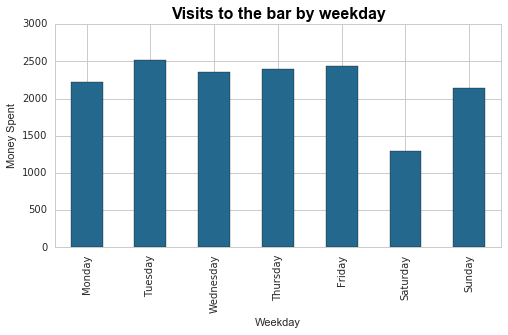

In [200]:
plot_bar_activity(7)

In [119]:
get_most_compatible(15)

D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\Sameer\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[[38, 204.9634113689563],
 [41, 261.15512631384433],
 [13, 569.8780571315235],
 [94, 649.4158913978007],
 [97, 669.917159057745],
 [11, 676.7584502612435],
 [0, 1039.4561077794483],
 [86, 1056.1879567576975],
 [73, 1058.9244543403463],
 [3, 1261.057096249016]]

In [124]:
get_most_compatible(38)

[[41, 103.47946656221224],
 [15, 204.9634113689563],
 [94, 444.7752241301217],
 [11, 545.3695994461004],
 [97, 666.2379454819427],
 [13, 729.4004387166216],
 [86, 990.2408797863276],
 [0, 1000.2324729781573],
 [73, 1229.6849189934794],
 [55, 1263.1452806387713]]

In [88]:
df['Vendor'].unique()


array(['Public Transportation - Train Pass', "Michael's Crafts",
       'Music Lessons - Piano', 'Amazon Order - Paint Bushes',
       'Painting Course Fees', 'Restaurant - Pizza', 'Art Auction',
       'Amazon Order - Paint Canvas', 'Lyft', 'Guitar Center',
       "Art's Art Supplies", "Ashley's Craft Store",
       "Ralph's Grocery Store", 'Restaurant - Burgers', 'Sprouts Market',
       'Taxi', 'Uber', 'Public Transportation - Bus Pass',
       'Restaurant - Chinese', 'Food Delivery - GrubHub',
       'Starbucks Coffee', 'Paycheck', 'Housing Rent',
       'ACS - Student Loans', 'Water & Sewer', 'Netflix Subscription',
       'Navient - Student Loans', 'Gas & Electric', 'Time Warner Cable',
       'Whole Foods', "Von's Groceries", 'Restaurant - Steakhouse',
       'Amazon Order - Baby Crib', 'Hospital - Prenatal Care',
       'Babies "R" Us', 'BuyBuyBaby.com', "Mark's Movers",
       'FedEx Shipping', "Jerome's Furniture", 'Home Depot',
       'Refrigerator Depot', 'Hamilton Move & S